# Marker Selection 

In [1]:
import pandas as pd
from malariagen_data.pv4 import Pv4
import numpy as np
import os
import matplotlib.pyplot as plt

# Load Data 

In [2]:
pv4 = Pv4("gs://pv4_staging/")
variant_dataset = pv4.variant_calls(extended=True)

Compile data files from each chromosome into one dataframe

In [3]:
results_directory = 'sliding_window_results'
i=0
for filename in os.listdir(results_directory):
    f = os.path.join(results_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        df = pd.read_csv(f, index_col=0)
        # Add chromosome name columns 
        df.insert(loc=0, column='chrom', value=filename.replace('_windowed_heterozygosity.csv',''))
        # Join dataframes together 
        if i==0: 
            results_df = df
        else: 
            results_df = results_df.append(df)
        i+=1

In [4]:
results_df

,chrom,window_start,window_end,variant_counts,unique_allele_counts,unique_alleles_with_missing_index,unique_alleles_with_het_index,unique_allele_frequencies,unique_allele_count,entropy,het
0,PvP01_05_v1,143737,143936,1,[ 2 463 4 225],[0],[2],"[0.002881844380403458, 0.6671469740634006, 0.0...",4,0.681778,0.449763
1,PvP01_05_v1,146187,146386,1,[216 5 473],[],[1],"[0.3112391930835735, 0.007204610951008645, 0.6...",3,0.660110,0.438559
2,PvP01_05_v1,146337,146536,3,[ 2 200 1 13 2 3 232 6 1 234],[0],"[2, 4, 5, 7, 8]","[0.002881844380403458, 0.2881844380403458, 0.0...",10,1.283084,0.691045
3,PvP01_05_v1,146387,146586,2,[ 2 434 7 1 250],[0],"[2, 3]","[0.002881844380403458, 0.6253602305475504, 0.0...",5,0.734008,0.479046
4,PvP01_05_v1,146487,146686,3,[ 2 1 219 2 212 2 5 1 1 15 4 230],"[0, 1, 8]","[3, 5, 6, 7, 10]","[0.002881844380403458, 0.001440922190201729, 0...",12,1.319225,0.696688
...,...,...,...,...,...,...,...,...,...,...,...
1746,PvP01_14_v1,3010171,3010370,10,[ 1 1 308 3 1 14 2 62 1 134 1 ...,"[0, 1, 6]","[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0.001440922190201729, 0.001440922190201729, 0...",19,1.645006,0.726690
1747,PvP01_14_v1,3010221,3010420,8,[ 2 1 370 1 138 1 29 10 1 120 3 ...,"[0, 1]","[3, 4, 5, 6, 7, 8, 9, 10, 11]","[0.002881844380403458, 0.001440922190201729, 0...",13,1.332126,0.643731
1748,PvP01_14_v1,3010271,3010470,4,[ 2 372 30 124 148 17 1],[0],"[2, 3, 4, 5]","[0.002881844380403458, 0.5360230547550432, 0.0...",7,1.224435,0.632797
1749,PvP01_14_v1,3010321,3010520,3,[ 14 320 2 358],[0],"[2, 3]","[0.020172910662824207, 0.4610951008645533, 0.0...",4,0.794019,0.520875


Save this dataframe as a new file 

In [5]:
results_df.to_csv(f"sliding_window_results/compiled_windowed_heterozygosity.csv")

In [6]:
results_df = results_df.sort_values(by=['chrom'])

In [7]:
# How many have het over 0.5 
results_df.loc[results_df['het']>0.5].shape

(3964, 11)

# Plot

Number of SNPs in each window across chromosomes 

In [8]:
man_colours = ['#C62828','#D81B60','#8E24AA','#5E35B1','#3949AB','#1E88E5','#039BE5','#00ACC1','#00897B','#43A047','#7CB342','#C0CA33','#FFB300','#F4511E']

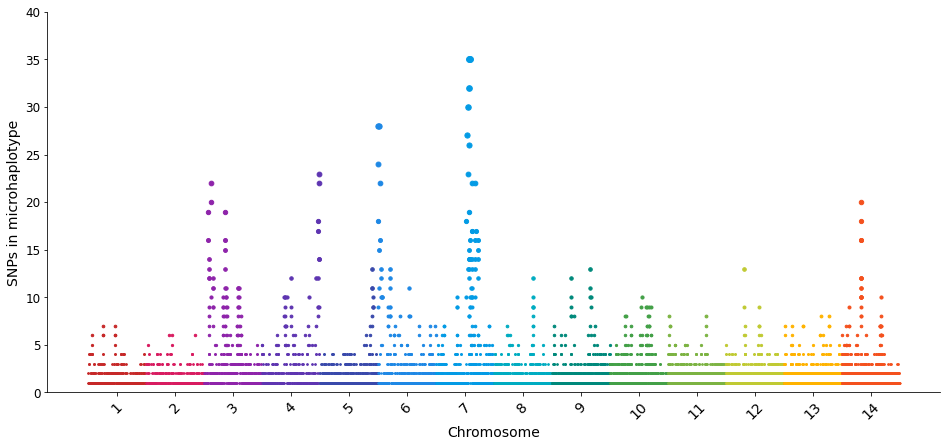

In [77]:
def plot_man():

    rcParams = plt.rcParams
    rcParams['font.size'] = 14
    rcParams['axes.labelsize'] = 14

    plt.rcParams['xtick.labelsize']=14
    plt.rcParams['ytick.labelsize']=12

    fig, ax = plt.subplots(figsize=(16, 7))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_ylim([0,40])
    ax.set_xlabel('Chromosome')
    ax.set_ylabel('SNPs in microhaplotype')
    
    colour_i=0
    chrom_num = 0 
    for chrom in results_df.chrom.unique(): 
        chrom_num += 1
        chrom_df = results_df.loc[results_df['chrom']==chrom]
        windows = chrom_df.shape[0]
        increment = 1/windows
        delta = 0
        x = chrom_num - (windows*increment/2)
        for index, row in chrom_df.iterrows():
            ax.scatter(x, row['variant_counts'], c=man_colours[colour_i],s=row['variant_counts'])
            x+=increment
        colour_i+=1
    plt.xticks(np.arange(1, 15, 1.0), rotation = 45)

plot_man()

# Select Windows
Three panels to be selected: 
* 3-10 candidate SNPs, optimised for highest heterozygosity 
* 3 SNP, max het 
* any SNP, any het (I think over 0.5 het) - chosen randomly

**3-10 SNP Panel**

In [71]:
panel_3_10_snp = results_df.loc[results_df['variant_counts'].between(3,10)].sort_values(by='het', ascending=False).head(n=130)

array([[<AxesSubplot:title={'center':'het'}>]], dtype=object)

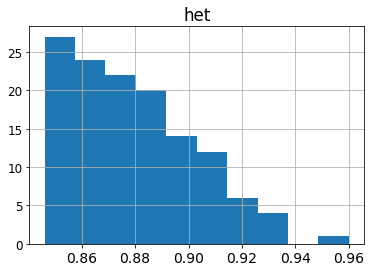

In [74]:
panel_3_10_snp.hist(column='het')

In [75]:
print('Mean het: ',panel_3_10_snp.het.mean())
print('Min het: ',panel_3_10_snp.het.min())
print('Max het: ',panel_3_10_snp.het.max())

Mean het:  0.8793193966461746
Min het:  0.8460829339999502
Max het:  0.9600569724854454


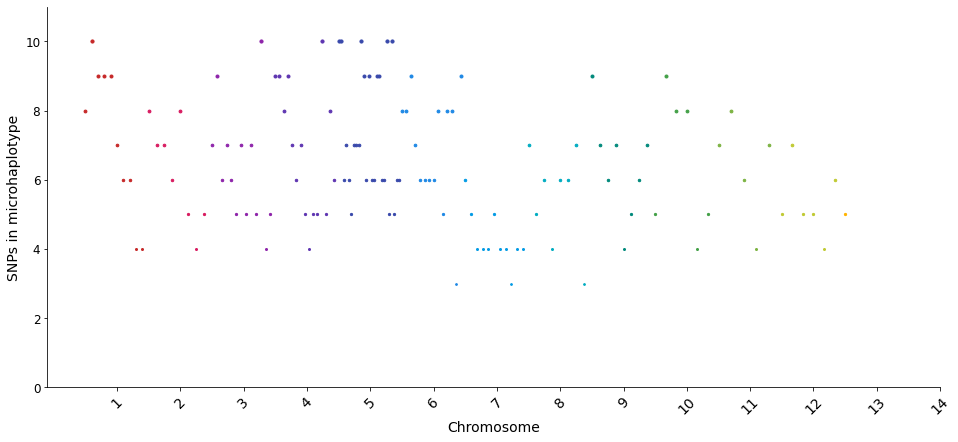

In [76]:
def plot_man():

    rcParams = plt.rcParams
    rcParams['font.size'] = 14
    rcParams['axes.labelsize'] = 14

    plt.rcParams['xtick.labelsize']=14
    plt.rcParams['ytick.labelsize']=12

    fig, ax = plt.subplots(figsize=(16, 7))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_ylim([0,11])
    ax.set_xlabel('Chromosome')
    ax.set_ylabel('SNPs in microhaplotype')
    
    colour_i=0
    chrom_num = 0 
    for chrom in panel_3_10_snp.chrom.unique(): 
        chrom_num += 1
        chrom_df = panel_3_10_snp.loc[panel_3_10_snp['chrom']==chrom]
        windows = chrom_df.shape[0]
        increment = 1/windows
        delta = 0
        x = chrom_num - (windows*increment/2)
        for index, row in chrom_df.iterrows():
            ax.scatter(x, row['variant_counts'], c=man_colours[colour_i],s=row['variant_counts'])
            x+=increment
        colour_i+=1
    plt.xticks(np.arange(1, 15, 1.0), rotation = 45)

plot_man()

In [12]:
results_df.loc[(results_df.chrom=='PvP01_12_v1') & (results_df.variant_counts>3)].shape

(36, 11)

In [ ]:
results_df.loc[(results_df.variant_counts == 3)]